In [1]:
!pip install tensorflow

# **Import Dataset**

In [2]:
# install pustaka kaggle
!pip install kaggle

In [3]:
# Buat direktori bernama “.kaggle”
! mkdir ~/.kaggle

In [4]:
# Salin “kaggle.json” ke direktori baru ini
! cp kaggle.json ~/.kaggle/
# Alokasikan izin yang diperlukan untuk berkas ini.
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download ellentheodora/tanaman-herbal

Dataset URL: https://www.kaggle.com/datasets/ellentheodora/tanaman-herbal
License(s): MIT
 96% 361M/375M [00:02<00:00, 117MB/s]
100% 375M/375M [00:03<00:00, 129MB/s]


In [6]:
# perintah unzip untuk mengekstrak data
!unzip tanaman-herbal.zip -d /content/tanaman-herbal

Archive:  tanaman-herbal.zip
  inflating: /content/tanaman-herbal/Dataset/Belimbing Wuluh/Belimbing Wuluh001.jpg  
  inflating: /content/tanaman-herbal/Dataset/Belimbing Wuluh/Belimbing Wuluh002.jpg  
  inflating: /content/tanaman-herbal/Dataset/Belimbing Wuluh/Belimbing Wuluh003.jpg  
  inflating: /content/tanaman-herbal/Dataset/Belimbing Wuluh/Belimbing Wuluh004.jpg  
  inflating: /content/tanaman-herbal/Dataset/Belimbing Wuluh/Belimbing Wuluh005.jpg  
  inflating: /content/tanaman-herbal/Dataset/Belimbing Wuluh/Belimbing Wuluh006.jpg  
  inflating: /content/tanaman-herbal/Dataset/Belimbing Wuluh/Belimbing Wuluh007.jpg  
  inflating: /content/tanaman-herbal/Dataset/Belimbing Wuluh/Belimbing Wuluh008.jpg  
  inflating: /content/tanaman-herbal/Dataset/Belimbing Wuluh/Belimbing Wuluh009.jpg  
  inflating: /content/tanaman-herbal/Dataset/Belimbing Wuluh/Belimbing Wuluh010.jpg  
  inflating: /content/tanaman-herbal/Dataset/Belimbing Wuluh/Belimbing Wuluh011.jpg  
  inflating: /content/tan

In [7]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path ke dataset hasil ekstraksi
path_dataset = '/content/tanaman-herbal/Dataset'

# Mengecek apakah struktur direktori sudah benar
if os.path.exists(path_dataset):
    print("Path dataset ditemukan.")
else:
    print("Path dataset tidak ditemukan. Pastikan path benar dan dataset sudah diekstrak.")

Path dataset ditemukan.


# **Data Augmentation**

In [8]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Tentukan ukuran batch
batch_size = 128
# Membuat generator untuk data training
train_datagen = ImageDataGenerator(
    validation_split=0.2,  # Pembagian dataset menjadi train dan
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,  # Example: Adding rotation
    width_shift_range=0.2,
    height_shift_range=0.2
)

train_generator = train_datagen.flow_from_directory(
    path_dataset,
    target_size=(224, 224),  # Sesuaikan dengan ukuran input CNN Anda
    batch_size=batch_size,
    seed=100,
    class_mode='categorical',  # Sesuaikan dengan jenis klasifikasi yang Anda lakukan
    subset='training'  # Menandakan bahwa ini adalah bagian training set
)

# Membuat generator untuk data validasi
validation_generator = train_datagen.flow_from_directory(
    path_dataset,
    target_size=(224, 224),  # Sesuaikan dengan ukuran input CNN Anda
    batch_size=batch_size,
    seed=200,
    class_mode='categorical',  # Sesuaikan dengan jenis klasifikasi yang Anda lakukan
    subset='validation'  # Menandakan bahwa ini adalah bagian validation set
)

# Output informasi tentang dataset
print("Jumlah kelas:", len(train_generator.class_indices))
print("Jumlah data training:", train_generator.n)
print("Jumlah data validation:", validation_generator.n)

Found 2800 images belonging to 10 classes.
Found 700 images belonging to 10 classes.
Jumlah kelas: 10
Jumlah data training: 2800
Jumlah data validation: 700


# **Modelling and Training**


In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Mendefinisikan model CNN
model = models.Sequential()

# Convolutional layers dengan max pooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten data
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(10, activation='softmax'))

# Compile model
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Menampilkan summary model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 10, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,554,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,127,818 (31.01 MB)

 Trainable params: 8,127,818 (31.01 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

epochs = 100

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // batch_size
)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 92s 3s/step - accuracy: 0.1099 - loss: 2.2791 - val_accuracy: 0.2328 - val_loss: 2.0433
Epoch 2/100
 1/21 ━━━━━━━━━━━━━━━━━━━━ 5:19 16s/step - accuracy: 0.1429 - loss: 2.1486

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


21/21 ━━━━━━━━━━━━━━━━━━━━ 19s 156ms/step - accuracy: 0.1429 - loss: 2.1486 - val_accuracy: 0.1667 - val_loss: 2.0647
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.2621 - loss: 1.9771 - val_accuracy: 0.3625 - val_loss: 1.6494
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.3984 - loss: 1.5911 - val_accuracy: 0.3500 - val_loss: 1.4938
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.3468 - loss: 1.7616 - val_accuracy: 0.3516 - val_loss: 1.5813
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.4062 - loss: 1.5034 - val_accuracy: 0.3833 - val_loss: 1.6874
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.4451 - loss: 1.4744 - val_accuracy: 0.4719 - val_loss: 1.3835
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.4844 - loss: 1.3242 - val_accuracy: 0.4500 - val_loss: 1.3808
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.4586 - loss: 1.4361 - val_accuracy: 0.4250 - val_los

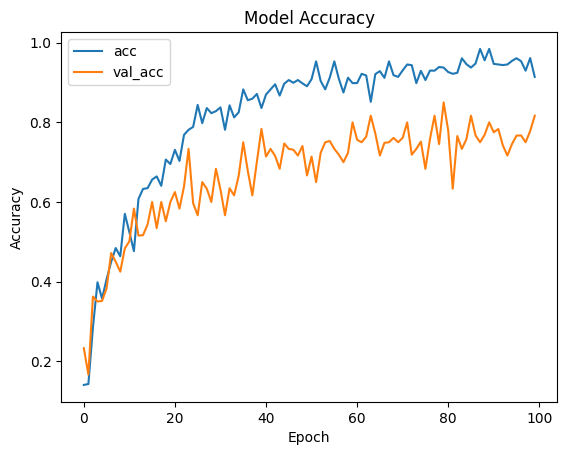

In [11]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

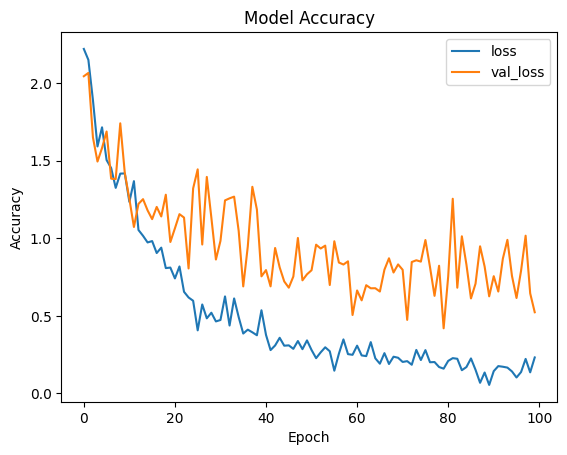

In [12]:
import matplotlib.pyplot as plt


# Plot training history
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
# Membuat generator untuk data testing
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    path_dataset,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

# Evaluate model
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.n // batch_size)
print("Test Accuracy:", test_accuracy)


Found 3500 images belonging to 10 classes.
27/27 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9509 - loss: 0.1423
Test Accuracy: 0.9479166865348816


Saving depositphotos_90308402-stock-photo-front-of-jackfruit-leaves-on.jpg to depositphotos_90308402-stock-photo-front-of-jackfruit-leaves-on.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Kelas prediksi: {'Belimbing Wuluh': 0, 'Jambu Biji': 1, 'Jeruk Nipis': 2, 'Kemangi': 3, 'Lidah Buaya': 4, 'Nangka': 5, 'Pandan': 6, 'Pepaya': 7, 'Seledri': 8, 'Sirih': 9}
Kelas hasil prediksi: Nangka


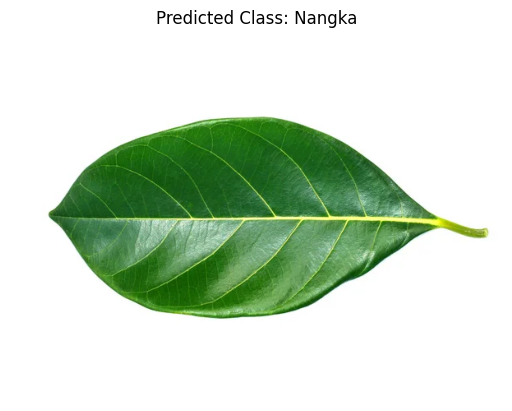

In [40]:
from google.colab import drive, files
import os
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Upload an image
uploaded = files.upload()

# Load the uploaded image
img_path = list(uploaded.keys())[0]
img = image.load_img(img_path, target_size=(224, 224))

# Convert the image to a numpy array
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize

# Make predictions
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)

# Print the predicted class
print("Kelas prediksi:", train_generator.class_indices)
print("Kelas hasil prediksi:", list(train_generator.class_indices.keys())[predicted_class_index])

# Display the image with predicted class
plt.imshow(image.load_img(img_path))
plt.title(f"Predicted Class: {list(train_generator.class_indices.keys())[predicted_class_index]}")
plt.axis("off")
plt.show()


# **Save the model**

In [96]:
SAVED_MODEL = "/content/model.h5"
model.save(SAVED_MODEL)

In [99]:
from google.colab import files
files.download("/content/model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [100]:
import tensorflow as tf

tf.saved_model.save(model, 'saved_model')


In [101]:
# Convert model ke TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save TFLite model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpah6ldmij'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  134040587004640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134040568644704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134040567425232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134040567419952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134040567427696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134040567663424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134040567430688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134040567670640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134040567675920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134040567676624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1340405678649

In [102]:
from google.colab import files
files.download("/content/model.tflite")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Predict using the TFLITE model**


In [107]:
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
from google.colab import files


# Path ke model TFLite
model_path = '/content/model.tflite'  # Sesuaikan path dengan lokasi model

# Load model TFLite
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Dapatkan detail input dan output dari model TFLite
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
input_index = input_details[0]['index']
output_index = output_details[0]['index']

# Daftar kelas sesuai indeks
class_labels = {
    0: 'Belimbing Wuluh',
    1: 'Jambu Biji',
    2: 'Jeruk Nipis',
    3: 'Kemangi',
    4: 'Lidah Buaya',
    5: 'Nangka',
    6: 'Pandan',
    7: 'Pepaya',
    8: 'Seledri',
    9: 'Sirih'
}

# Ambang batas untuk prediksi
confidence_threshold = 50.0

# Upload gambar untuk prediksi
uploaded = files.upload()
for fn in uploaded.keys():
    # Load dan preprocess gambar
    img = load_img(fn, target_size=(224, 224))  # Sesuaikan ukuran target model
    img = img_to_array(img)  # Konversi ke array
    img = np.expand_dims(img, axis=0)  # Tambahkan dimensi batch
    img = img / 255.0  # Normalisasi jika diperlukan oleh model

    # Masukkan input ke model TFLite
    interpreter.set_tensor(input_index, img)
    interpreter.invoke()

    # Ambil hasil prediksi
    output_data = interpreter.get_tensor(output_index)

    # Dapatkan indeks kelas dengan probabilitas tertinggi
    predicted_index = np.argmax(output_data[0])

    # Cari nama kelas berdasarkan indeks
    predicted_class = class_labels[predicted_index]
    predicted_confidence = output_data[0][predicted_index] * 100  # Menghitung tingkat keyakinan

    # Tampilkan hasil prediksi jika keyakinan lebih dari ambang batas
    if predicted_confidence >= confidence_threshold:
        print(f"{fn} diprediksi sebagai: {predicted_class} dengan tingkat keyakinan {predicted_confidence:.2f}%")
    else:
        print(f"{fn} prediksi tidak cukup yakin (keyakinan: {predicted_confidence:.2f}%)")


Saving pepaya tes.jpg to pepaya tes (4).jpg
pepaya tes (4).jpg diprediksi sebagai: Pepaya dengan tingkat keyakinan 100.00%
